In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [4]:
x_train = tf.cast(x_train, tf.float32)/255
x_test = tf.cast(x_test, tf.float32)/255

In [5]:
input_size = 784
shadow_size = 32
output_size = 784

In [6]:
inputs = tf.keras.layers.Input(shape=(input_size,))

# encoder
en = tf.keras.layers.Dense(shadow_size, activation="relu")(inputs)

# decoder
de = tf.keras.layers.Dense(output_size, activation="sigmoid")(en)

model = tf.keras.Model(inputs=inputs, outputs=de)

### 可视化绘制模型

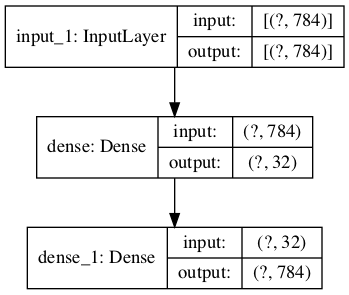

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [8]:
model.compile(optimizer="adam", loss="mse")

In [9]:
# 这里需要注意的是输入的数据和验证的数据都是一样的， 同理测试数据也相同。
model.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0695 - val_loss: 0.0413
Epoch 2/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0350 - val_loss: 0.0295
Epoch 3/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0265 - val_loss: 0.0233
Epoch 4/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0215 - val_loss: 0.0193
Epoch 5/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0183 - val_loss: 0.0166
Epoch 6/20
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0161 - val_loss: 0.0148
Epoch 7/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0145 - val_loss: 0.0134
Epoch 8/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0132 - val_loss: 0.0124
Epoch 9/20
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0123 - val_

### 如何去使用我们的编码器和解码器

In [25]:
# 编码器
encode = tf.keras.Model(inputs=inputs, outputs=en)

# 解码器
input_de = tf.keras.layers.Input(shape=(shadow_size, ))
output_de = model.layers[-1](input_de)
decode = tf.keras.Model(inputs=input_de, outputs=output_de)

In [26]:
# 使用x_test进行效果测试
encode_test = encode(x_test)

decode_test = decode(encode_test)
x_test[1].numpy().reshape((28, 28)).shape

(28, 28)

### 绘图观察效果

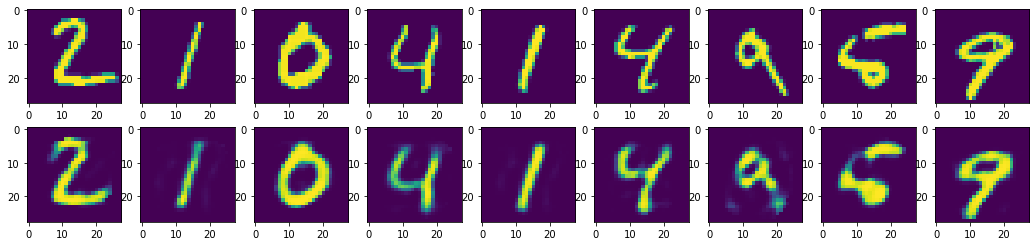

In [30]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].numpy().reshape(28, 28))
    ax = plt.subplot(2, n, i+n)
    plt.imshow(decode_test[i].numpy().reshape(28, 28))